In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.0.0-rc0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_lables),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(test_images)

10000

## 数据预处理

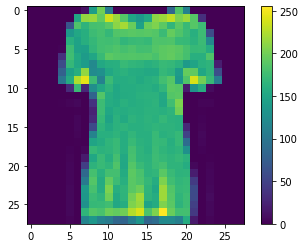

In [15]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()